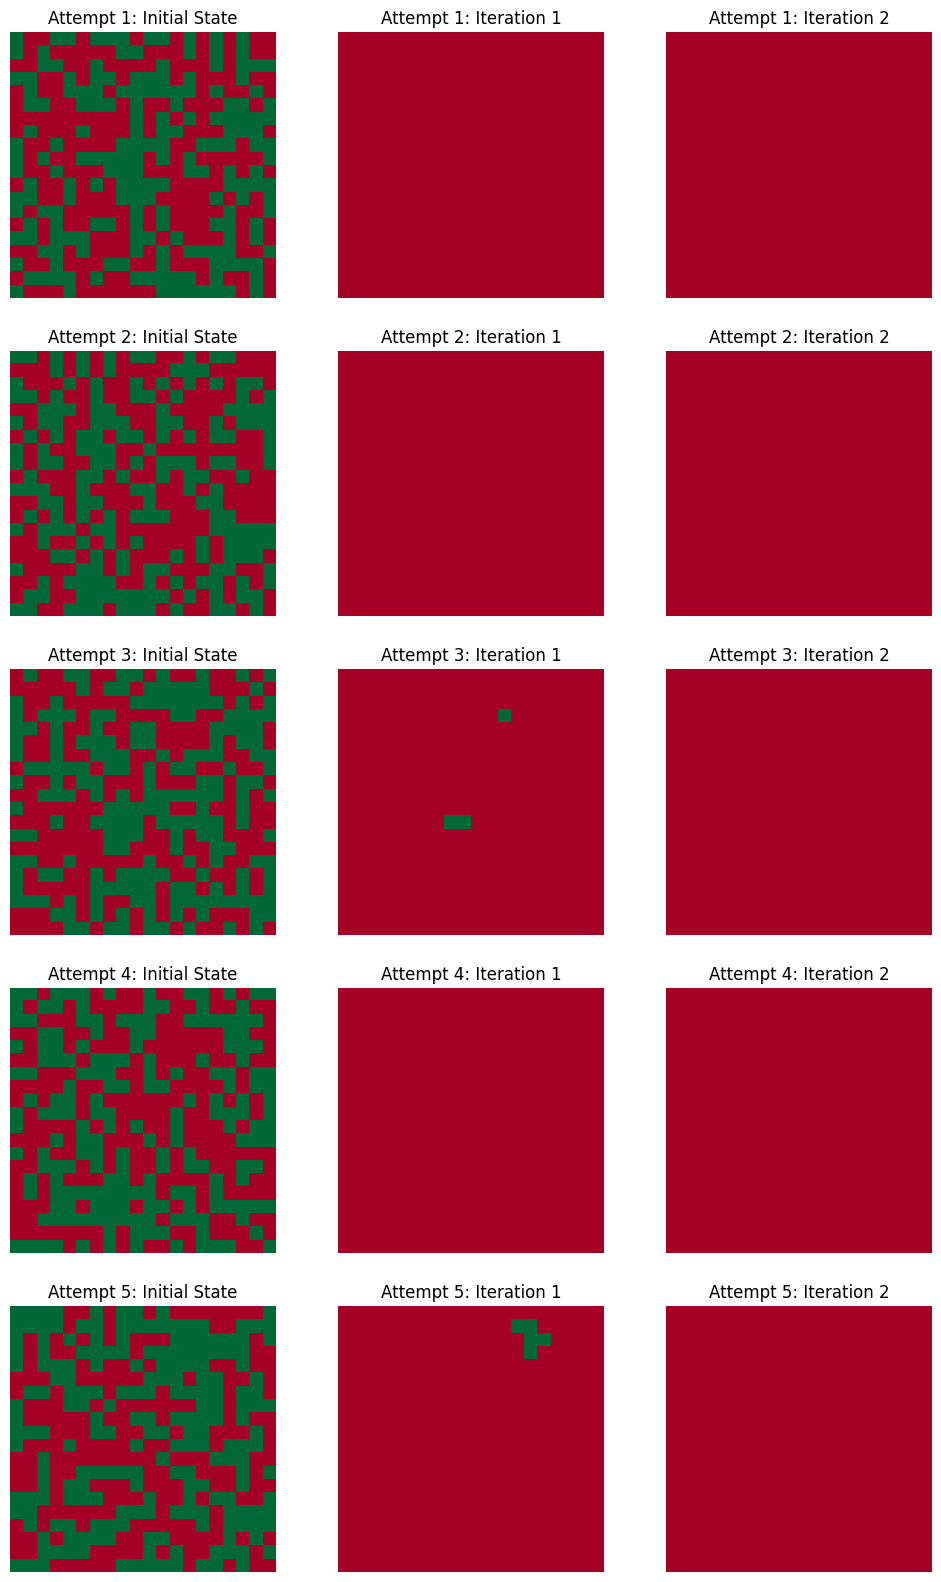

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# TORUS

#Traditional Prisoner's Dilemma

# Define payoff values
T = 5
R = 3
P = 1
S = 0

# Total number of iterations
total_iterations = 2  # Change as needed
# Plot every nth iteration
plot_interval = 1

# Number of attempts
num_attempts = 5

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Calculate number of plotted iterations
plotted_iterations = total_iterations // plot_interval

# Calculate number of rows and columns for subplots
rows = num_attempts
cols = plotted_iterations + 1  # +1 for initial state

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Run simulation for each attempt
for attempt in range(num_attempts):
    # Initialize 20x20 strategy matrix
    strategies = ['C', 'D']
    A = np.random.choice(strategies, size=(20, 20), p=[0.5, 0.5])

    # Plot initial state
    axes[attempt, 0].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
    axes[attempt, 0].set_title(f"Attempt {attempt + 1}: Initial State")
    axes[attempt, 0].axis('off')

    # Run simulation
    for iteration in range(total_iterations + 1):
        # Initialize score matrix
        B = np.zeros((20, 20))

        # Compute score matrix
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                if A[i, j] == 'C':
                    B[i, j] += R if A[up, j] == 'C' else S
                    B[i, j] += R if A[down, j] == 'C' else S
                    B[i, j] += R if A[i, left] == 'C' else S
                    B[i, j] += R if A[i, right] == 'C' else S
                else:
                    B[i, j] += T if A[up, j] == 'C' else P
                    B[i, j] += T if A[down, j] == 'C' else P
                    B[i, j] += T if A[i, left] == 'C' else P
                    B[i, j] += T if A[i, right] == 'C' else P

        # Create new strategy matrix
        A_new = A.copy()

        # Update strategies
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                # Collect neighbors' scores
                neighbors_scores = [B[up, j], B[down, j], B[i, left], B[i, right]]
                max_score = max(neighbors_scores)

                # Find all neighbors who have maximum score
                max_score_neighbors = []
                if B[up, j] == max_score:
                    max_score_neighbors.append(A[up, j])
                if B[down, j] == max_score:
                    max_score_neighbors.append(A[down, j])
                if B[i, left] == max_score:
                    max_score_neighbors.append(A[i, left])
                if B[i, right] == max_score:
                    max_score_neighbors.append(A[i, right])

                # If current player's score is less than max score, update strategy
                if B[i, j] < max_score:
                    A_new[i, j] = random.choice(max_score_neighbors)
                # Otherwise, keep current strategy
                else:
                    A_new[i, j] = A[i, j]

        # Update A for next iteration
        A = A_new

        # Plot strategy matrix for every nth iteration
        if iteration % plot_interval == 0 and iteration != 0:
            plot_index = iteration // plot_interval
            axes[attempt, plot_index].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
            axes[attempt, plot_index].set_title(f"Attempt {attempt + 1}: Iteration {iteration}")
            axes[attempt, plot_index].axis('off')

plt.show()


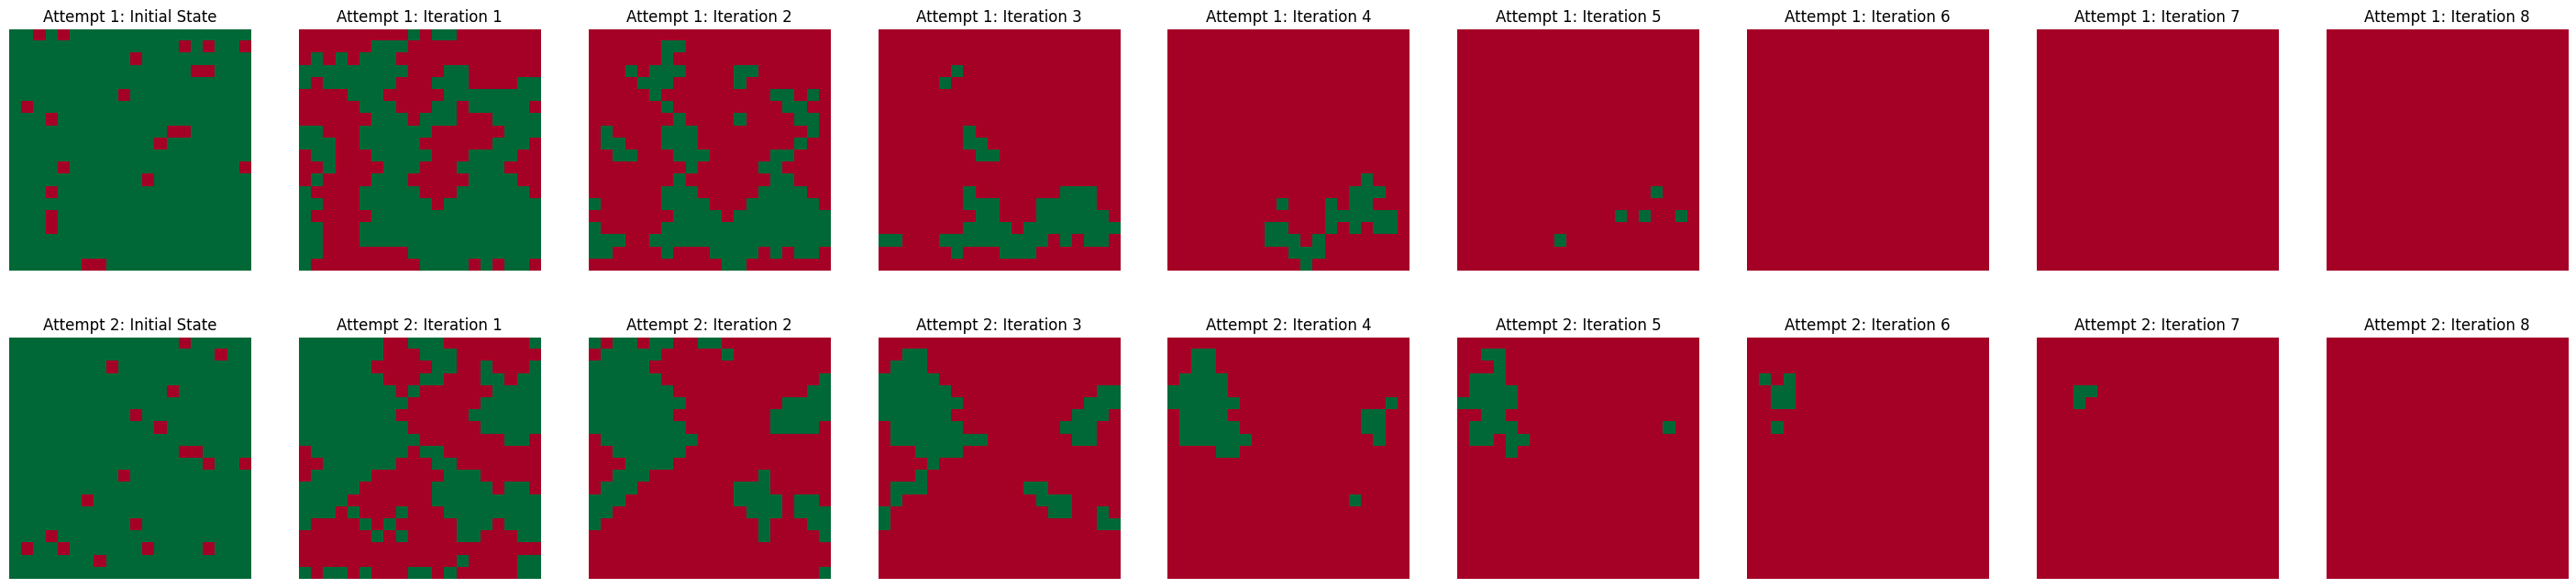

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# TORUS
#Skewing initial distribution

# Define payoff values
T = 5
R = 3
P = 1
S = 0

# Total number of iterations
total_iterations = 8  # Change as needed
# Plot every nth iteration
plot_interval = 1

# Number of attempts
num_attempts = 2

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Calculate number of plotted iterations
plotted_iterations = total_iterations // plot_interval

# Calculate number of rows and columns for subplots
rows = num_attempts
cols = plotted_iterations + 1  # +1 for initial state

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Run simulation for each attempt
for attempt in range(num_attempts):
    # Initialize 20x20 strategy matrix
    strategies = ['C', 'D']
    A = np.random.choice(strategies, size=(20, 20), p=[0.95, 0.05])

    # Plot initial state
    axes[attempt, 0].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
    axes[attempt, 0].set_title(f"Attempt {attempt + 1}: Initial State")
    axes[attempt, 0].axis('off')

    # Run simulation
    for iteration in range(total_iterations + 1):
        # Initialize score matrix
        B = np.zeros((20, 20))

        # Compute score matrix
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                if A[i, j] == 'C':
                    B[i, j] += R if A[up, j] == 'C' else S
                    B[i, j] += R if A[down, j] == 'C' else S
                    B[i, j] += R if A[i, left] == 'C' else S
                    B[i, j] += R if A[i, right] == 'C' else S
                else:
                    B[i, j] += T if A[up, j] == 'C' else P
                    B[i, j] += T if A[down, j] == 'C' else P
                    B[i, j] += T if A[i, left] == 'C' else P
                    B[i, j] += T if A[i, right] == 'C' else P

        # Create new strategy matrix
        A_new = A.copy()

        # Update strategies
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                # Collect neighbors' scores
                neighbors_scores = [B[up, j], B[down, j], B[i, left], B[i, right]]
                max_score = max(neighbors_scores)

                # Find all neighbors who have maximum score
                max_score_neighbors = []
                if B[up, j] == max_score:
                    max_score_neighbors.append(A[up, j])
                if B[down, j] == max_score:
                    max_score_neighbors.append(A[down, j])
                if B[i, left] == max_score:
                    max_score_neighbors.append(A[i, left])
                if B[i, right] == max_score:
                    max_score_neighbors.append(A[i, right])

                # If current player's score is less than max score, update strategy
                if B[i, j] < max_score:
                    A_new[i, j] = random.choice(max_score_neighbors)
                # Otherwise, keep current strategy
                else:
                    A_new[i, j] = A[i, j]

        # Update A for next iteration
        A = A_new

        # Plot strategy matrix for every nth iteration
        if iteration % plot_interval == 0 and iteration != 0:
            plot_index = iteration // plot_interval
            axes[attempt, plot_index].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
            axes[attempt, plot_index].set_title(f"Attempt {attempt + 1}: Iteration {iteration}")
            axes[attempt, plot_index].axis('off')

plt.show()

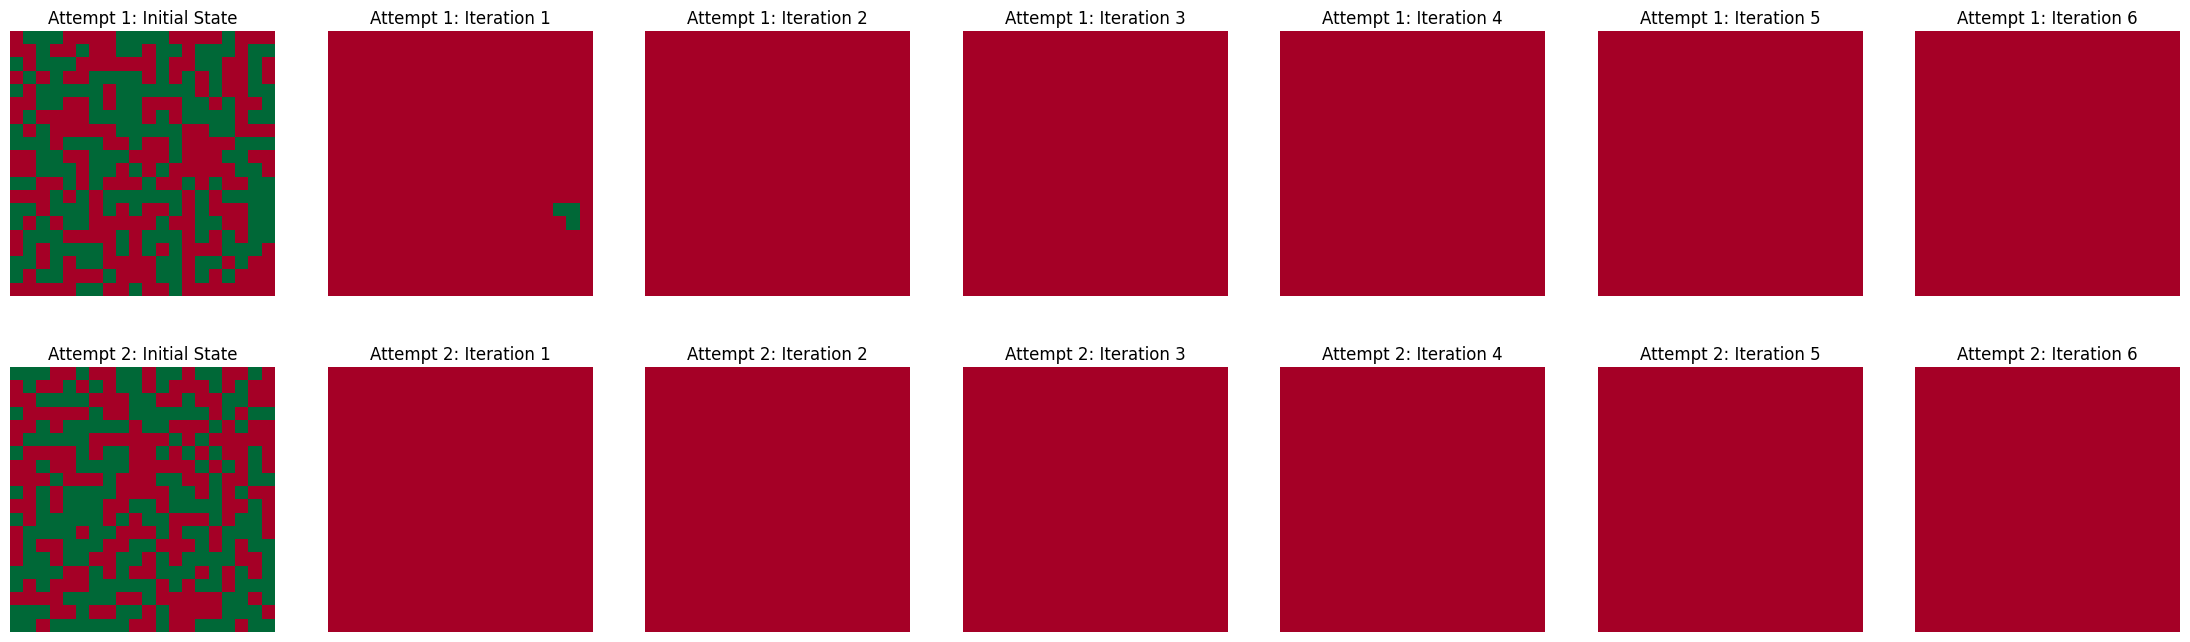

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# TORUS
#changing the payoffs

# Define payoff values
T = 5
R = 3
P = 0.5
S = 0

# Total number of iterations
total_iterations = 6  # Change as needed
# Plot every nth iteration
plot_interval = 1

# Number of attempts
num_attempts = 2

# Convert 'C' and 'D' to colors
def strategy_to_color(strategy_matrix):
    return np.where(strategy_matrix == 'C', 1, 0)

# Calculate number of plotted iterations
plotted_iterations = total_iterations // plot_interval

# Calculate number of rows and columns for subplots
rows = num_attempts
cols = plotted_iterations + 1  # +1 for initial state

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Run simulation for each attempt
for attempt in range(num_attempts):
    # Initialize 20x20 strategy matrix
    strategies = ['C', 'D']
    A = np.random.choice(strategies, size=(20, 20), p=[0.5, 0.5])

    # Plot initial state
    axes[attempt, 0].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
    axes[attempt, 0].set_title(f"Attempt {attempt + 1}: Initial State")
    axes[attempt, 0].axis('off')

    # Run simulation
    for iteration in range(total_iterations + 1):
        # Initialize score matrix
        B = np.zeros((20, 20))

        # Compute score matrix
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                if A[i, j] == 'C':
                    B[i, j] += R if A[up, j] == 'C' else S
                    B[i, j] += R if A[down, j] == 'C' else S
                    B[i, j] += R if A[i, left] == 'C' else S
                    B[i, j] += R if A[i, right] == 'C' else S
                else:
                    B[i, j] += T if A[up, j] == 'C' else P
                    B[i, j] += T if A[down, j] == 'C' else P
                    B[i, j] += T if A[i, left] == 'C' else P
                    B[i, j] += T if A[i, right] == 'C' else P

        # Create new strategy matrix
        A_new = A.copy()

        # Update strategies
        for i in range(20):
            for j in range(20):
                up = (i - 1) % 20
                down = (i + 1) % 20
                left = (j - 1) % 20
                right = (j + 1) % 20

                # Collect neighbors' scores
                neighbors_scores = [B[up, j], B[down, j], B[i, left], B[i, right]]
                max_score = max(neighbors_scores)

                # Find all neighbors who have maximum score
                max_score_neighbors = []
                if B[up, j] == max_score:
                    max_score_neighbors.append(A[up, j])
                if B[down, j] == max_score:
                    max_score_neighbors.append(A[down, j])
                if B[i, left] == max_score:
                    max_score_neighbors.append(A[i, left])
                if B[i, right] == max_score:
                    max_score_neighbors.append(A[i, right])

                # If current player's score is less than max score, update strategy
                if B[i, j] < max_score:
                    A_new[i, j] = random.choice(max_score_neighbors)
                # Otherwise, keep current strategy
                else:
                    A_new[i, j] = A[i, j]

        # Update A for next iteration
        A = A_new

        # Plot strategy matrix for every nth iteration
        if iteration % plot_interval == 0 and iteration != 0:
            plot_index = iteration // plot_interval
            axes[attempt, plot_index].imshow(strategy_to_color(A), cmap='RdYlGn', interpolation='nearest')
            axes[attempt, plot_index].set_title(f"Attempt {attempt + 1}: Iteration {iteration}")
            axes[attempt, plot_index].axis('off')

plt.show()
